# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [4]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [6]:
df.head()




,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

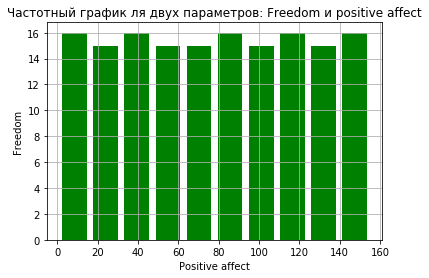

In [14]:
new_freedom = df['Freedom'].dropna()
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist([new_freedom, df['Positive affect']], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график ля двух параметров: Freedom и positive affect')
plt.grid(True)
plt.show()

#похоже, что это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию,
 минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [15]:
#медиана
print('Медиана: ', statistics.median(new_freedom))

Медиана:  78.0


In [16]:
#мода
new_freedom = df['Freedom'].dropna()
freedom_counts = {}
for p in new_freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [17]:
#математическое ожидание
statistics.mean(df['Freedom'])
new_freedom = df['Freedom'].dropna()
sum(new_freedom)/len(new_freedom)


78.0

In [18]:
#Стандартное отклонение
statistics.pstdev(new_freedom)

44.74371464239419

In [20]:
statistics.pvariance(new_freedom)

2002.0

In [29]:
duration_range = max(new_freedom) - min(new_freedom)
print(duration_range)

154.0


In [21]:
new_freedom.isnull().sum()

0

Посмотреть корреляцию между Freedom и positive affect (графически и математически).
Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

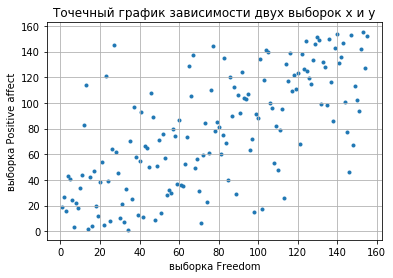

In [23]:
Freedom= df['Freedom']
Positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')



In [12]:
from scipy.stats import pearsonr
x = new_freedom
y = df['Positive affect'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

NameError: name 'new_freedom' is not defined

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [34]:
#центрирование
print(statistics.mean(new_freedom))
new_freedom_1 = new_freedom - statistics.mean(new_freedom)
print(statistics.mean(new_freedom_1))
#масштабирование
min(new_freedom_1)
max(new_freedom_1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

new_freedom_2 = min_max_scaler.fit_transform(np.array(new_freedom_1).reshape(-1, 1))
print(min(new_freedom_2))
print(max(new_freedom_2))



78.0
0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

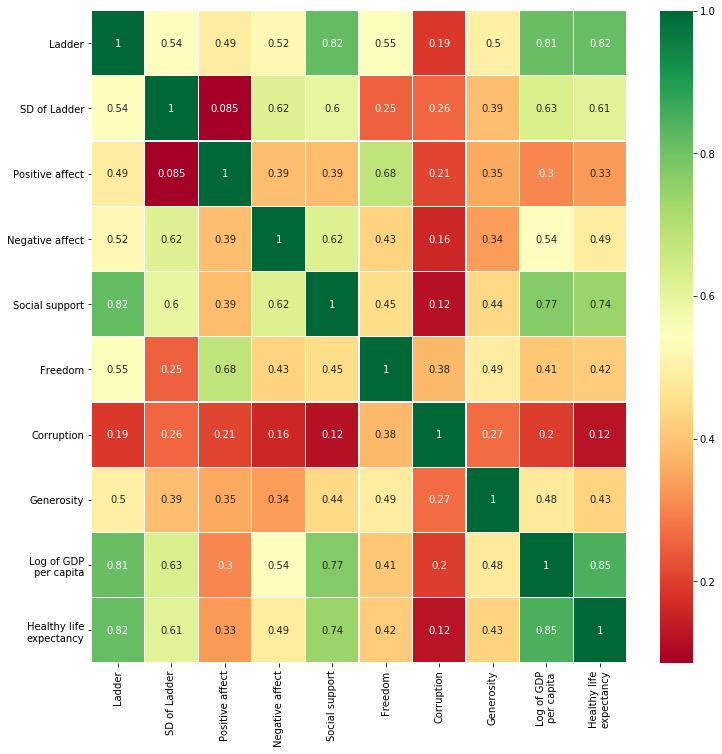

In [36]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()



Загрузить следующую таблицу: 

In [5]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

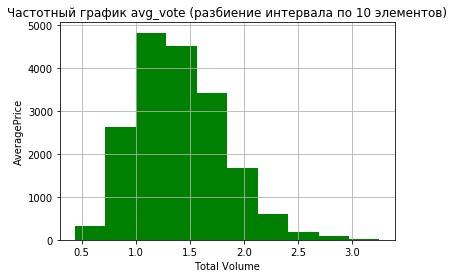

In [6]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
#это нормальное распределение



Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932
-0.2083170484878848


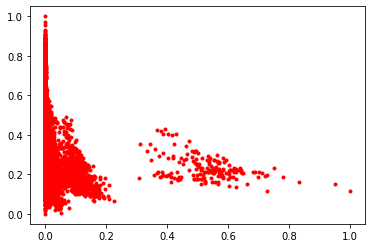

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])
total_4046 = df_norm[0]
av_pr = df_norm[1]
plt.plot(total_4046, av_pr, 'r.')
plt.show()
corr, p_value = pearsonr(total_4046, av_pr)
print(corr)